In [1]:
  #install datasets library to import imdb dataset
  !pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datasets import load_dataset
#load imdb data
df = load_dataset("stanfordnlp/imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
df # data is stored in json format

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
train_data = df["train"] #train data
test_data = df["test"] # test data

In [ ]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [6]:
train_df = pd.DataFrame(df["train"]) # converted data obtained in json format to pandas dataframe
test_df = pd.DataFrame(df["test"])

In [ ]:
train_df.isna().sum() # no null values in train data

text     0
label    0
dtype: int64

In [ ]:
test_df.isna().sum() # no null values in test data

text     0
label    0
dtype: int64

In [ ]:
print('train data counts',train_df['label'].value_counts())
print('test data counts',test_df['label'].value_counts()) # data is balanced with 12.5k observations in each class

train data counts label
0    12500
1    12500
Name: count, dtype: int64
test data counts label
0    12500
1    12500
Name: count, dtype: int64


In [ ]:
x = train_data['text']


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#preprocessing data which we will use for world cloud

happy_emojis = [':-D', ':)', ':P', ';)', ';-)']
sad_emojis = [':(', ';(', ':—',':-(']

#define expanding contraction
dict = {
    'don\'t': 'do not',
    'didn\'t': 'did not',
    'thx': 'thanks',
    'thnx': 'thanks',
    'shouldn\'t': 'should not',
    'wouldn\'t': 'would not',
    'couldn\'t': 'could not',
    'haven\'t': 'have not',
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "isn't" : "is not"

}

#define pre-process function
def preprocess(text):
    text = text.lower() #lowercase the rext
    text = re.sub('<br />', '', text) #remove hyperlink
    text = re.sub(r'http\S+', '', text) #remove webaddress
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Replace emotion patterns
    for emoji in happy_emojis:
        text = text.replace(emoji, 'happy')
    for emoji in sad_emojis:
        text = text.replace(emoji, 'sad')


    puntuation_pattern = re.compile(r'\b(' + '|'.join(dict.keys()) + r')\b')
    text = puntuation_pattern.sub(lambda x: dict[x.group(0)], text) #replace short forms with full forms

    text = text.replace('?', ' questionmark') #define ? and ! to a word which could define emotions of positive and
    text = text.replace('!', ' exclamatorymark')

    text = re.sub('[^a-zA-Z]', ' ', text) #remove non alphabatical character

    tokens = re.findall(r'\b\w+\b', text) # text to tokens, split on space


    # lemitization and remove stop words
    lemmatize = WordNetLemmatizer()
    stopWords = set(stopwords.words('english'))
    stopWords = set(stopWords)
    stopWords.discard('not') # not including not in stop word
    stopWords.discard('but') #not including but in stop word

    text_lemma = [lemmatize.lemmatize(word) for word in tokens if word not in stopWords]


    text = ' '.join(text_lemma) #convert to original text by joining with space

    return text

In [ ]:
cleaned_reviews = [preprocess(text) for text in x] #pre-process reviews

In [ ]:
cleaned_reviews[:2] #display first two cleaned reiews

['rented curious yellow video store controversy surrounded first released also heard first seized u custom ever tried enter country therefore fan film considered controversial really see plot centered around young swedish drama student named lena want learn everything life particular want focus attention making sort documentary average swede thought certain political issue vietnam war race issue united state asking politician ordinary denizen stockholm opinion politics sex drama teacher classmate married men kill curious yellow year ago considered pornographic really sex nudity scene far even not shot like cheaply made porno countryman mind find shocking reality sex nudity major staple swedish cinema even ingmar bergman arguably answer good old boy john ford sex scene film commend filmmaker fact sex shown film shown artistic purpose rather shock people make money shown pornographic theater america curious yellow good film anyone wanting study meat potato pun intended swedish cinema but

In [ ]:
df1 = pd.DataFrame(cleaned_reviews, columns = ['cleaned_text']) #created a dataframe with cleaned reviews with their labels in train data

In [ ]:
df1.head()

,cleaned_text
0,rented curious yellow video store controversy ...
1,curious yellow risible pretentious steaming pi...
2,avoid making type film future film interesting...
3,film probably inspired godard masculin f minin...
4,oh brother hearing ridiculous film umpteen yea...


In [ ]:
df1['labels'] = train_df['label']

In [ ]:
df1.head()

,cleaned_text,labels
0,rented curious yellow video store controversy ...,0
1,curious yellow risible pretentious steaming pi...,0
2,avoid making type film future film interesting...,0
3,film probably inspired godard masculin f minin...,0
4,oh brother hearing ridiculous film umpteen yea...,0


In [ ]:
positive_reviews = df1[df1['labels']==1]['cleaned_text']
negative_reviews = df1[df1['labels']==0]['cleaned_text']
positive_reviews = positive_reviews.to_list()

In [ ]:
negative_reviews = negative_reviews.to_list()

In [ ]:
positive_reviews[:2]

['zentropa much common third man another noir like film set among rubble postwar europe like ttm much inventive camera work innocent american get emotionally involved woman not really understand whose naivety striking contrast native but say third man well crafted storyline zentropa bit disjointed respect perhaps intentional presented dream nightmare making coherent would spoil effect movie unrelentingly grim noir one sense one never see sun shine grim but intriguing frightening',
 'zentropa original movie seen year like unique thriller influenced film noir right cure hollywood summer blockbuster clogging theater day von trier follow ups like breaking wave gotten acclaim but really best work flashy without distracting offer perfect combination suspense dark humor bad decided handheld camera wave future hard say talked away style exhibit but everyone loss went heavily theoretical dogma direction instead']

In [ ]:

stopwords = set(STOPWORDS)
stopwords.add('film') # remove stop words , it was already done in pre-processing step but removing 'film' and 'movie' words from the corpus
stopwords.add('movie') # these words carry less weigh as we already know we are doing analysis on movie
positive_wordcloud = WordCloud(width=1400, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(str(positive_reviews))

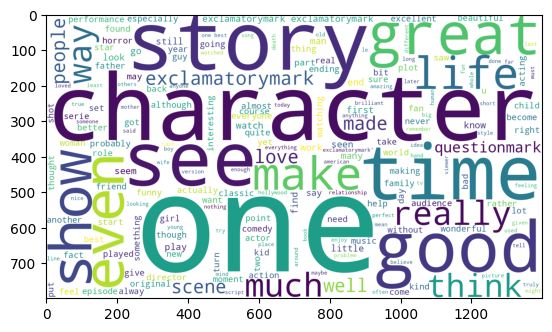

In [ ]:
#display world cloud of positive reviews
plt.imshow(positive_wordcloud)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add('film') # remove stop words , it was already done in pre-processing step but removing 'film' and 'movie' words from the corpus
stopwords.add('movie') # these words carry less weigh as we already know we are doing analysis on movie
negative_wordcloud = WordCloud(width=1400, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(str(negative_reviews))

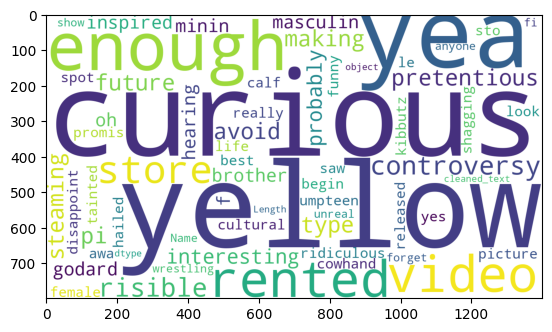

In [ ]:
#display world cloud of negative reviews
plt.imshow(negative_wordcloud)

<Axes: xlabel='text', ylabel='Count'>

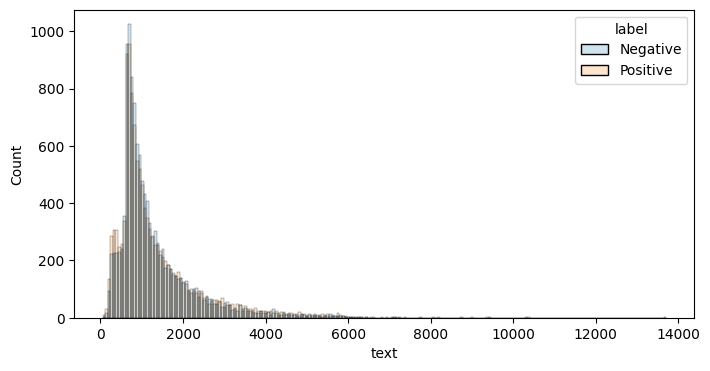

In [15]:
#histogram of to see the length of reviews in both class (0-positive and 1-negative)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))

dict = {0: 'Negative', 1: 'Positive'}
sns.histplot(x =train_df['text'].apply(len), hue= train_df['label'].map(dict), alpha =0.2) #there is not difference in length of both the type of class in terms of length of views